# Example: Recreate the plots from Grujic 2018

Recreate plots from:

- D. N. Grujic, “Closed-Form Solution of Rough Conductor Surface Impedance,” IEEE Trans. Microw. Theory Tech., vol. 66, no. 11, pp. 4677–4683, 2018, doi: [10.1109/TMTT.2018.2864586](https://doi.org/10.1109/TMTT.2018.2864586).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

import gradientmodel as gm

# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Normalized Magnetic Field $B_y$

In [3]:
sigma0 = 5.8e7
rq = 1 * sc.micro

x = np.linspace(-5*sc.micro, 5*sc.micro, 101)

f = 1 * sc.giga
By1 = gm.mag_field(x, f, rq, sigma0=sigma0)
By1 /= By1[0]

f = 10 * sc.giga
By2 = gm.mag_field(x, f, rq, sigma0=sigma0)
By2 /= By2[0]

f = 100 * sc.giga
By3 = gm.mag_field(x, f, rq, sigma0=sigma0)
By3 /= By3[0]

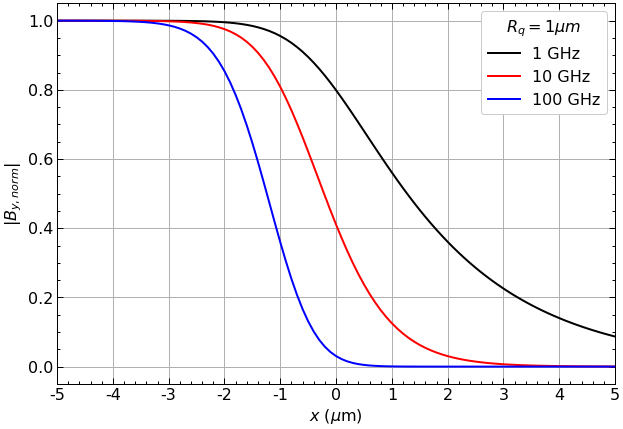

In [4]:
# Recreate Figure 3 in Grujic 2018

plt.figure(figsize=(10,7))
plt.plot(x/sc.micro, np.abs(By1), 'k', label="1 GHz")
plt.plot(x/sc.micro, np.abs(By2), 'r', label="10 GHz")
plt.plot(x/sc.micro, np.abs(By3), 'b', label="100 GHz")
plt.legend(frameon=True, framealpha=1, title="$R_q=1\mu m$")
plt.ylabel(r"$\vert B_{y,norm}\vert$")
plt.xlabel("$x$ ($\mu$m)")
plt.ylim([-0.05, 1.05])
plt.xlim([-5, 5])
plt.xticks(ticks=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], 
           labels=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
plt.grid();

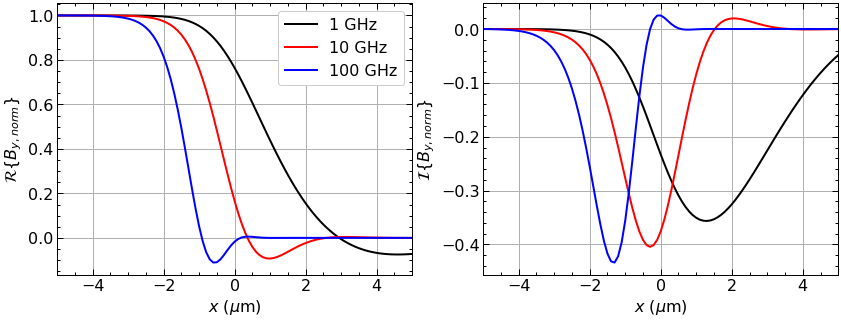

In [5]:
# Recreate Figure 4a in Grujic 2018

fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(x/sc.micro, np.real(By1), 'k', label="1 GHz")
ax[0].plot(x/sc.micro, np.real(By2), 'r', label="10 GHz")
ax[0].plot(x/sc.micro, np.real(By3), 'b', label="100 GHz")
ax[0].legend(frameon=True, framealpha=1)
ax[0].set_ylabel(r"$\mathcal{R}\{B_{y,norm}\}$")
ax[0].set_xlabel("$x$ ($\mu$m)")
ax[0].set_xlim([-5, 5])
ax[0].grid()

ax[1].plot(x/sc.micro, np.imag(By1), 'k', label="1 GHz")
ax[1].plot(x/sc.micro, np.imag(By2), 'r', label="10 GHz")
ax[1].plot(x/sc.micro, np.imag(By3), 'b', label="100 GHz")
ax[1].set_ylabel(r"$\mathcal{I}\{B_{y,norm}\}$")
ax[1].set_xlabel("$x$ ($\mu$m)")
ax[1].set_xlim([-5, 5])
ax[1].grid();

# Surface Impedance $Z_s$

In [6]:
sigma0 = 5.8e7

f = np.linspace(0.1, 100, 17) * sc.giga

rq = 1 * sc.micro
zs1, cond1, ur1 = gm.rough_properties(f, rq)

rq = 0.5 * sc.micro
zs2, cond2, ur2 = gm.rough_properties(f, rq)

rq = 0.25 * sc.micro
zs3, cond3, ur3 = gm.rough_properties(f, rq)

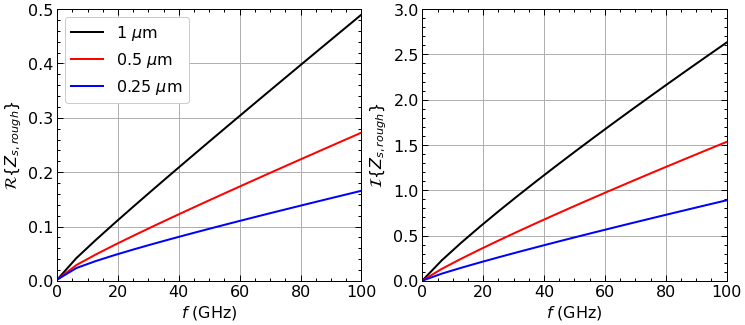

In [7]:
# Recreate Figure 5a in Grujic 2018

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(f/1e9, zs1.real, 'k', label=r'1 $\mu$m')
ax[0].plot(f/1e9, zs2.real, 'r', label=r'0.5 $\mu$m')
ax[0].plot(f/1e9, zs3.real, 'b', label=r'0.25 $\mu$m')
ax[0].legend(frameon=True, framealpha=1)
ax[0].set_ylabel(r"$\mathcal{{R}}\{Z_{s,rough}\}$")
ax[0].set_xlabel("$f$ (GHz)")
ax[0].set_ylim([0, 0.5])
ax[0].set_xlim([0, 100])
ax[0].grid()

ax[1].plot(f/1e9, zs1.imag, 'k', label=r'1 $\mu$m')
ax[1].plot(f/1e9, zs2.imag, 'r', label=r'0.5 $\mu$m')
ax[1].plot(f/1e9, zs3.imag, 'b', label=r'0.25 $\mu$m')
ax[1].set_ylabel(r"$\mathcal{{I}}\{Z_{s,rough}\}$")
ax[1].set_xlabel("$f$ (GHz)")
ax[1].set_ylim([0, 3.0])
ax[1].set_xlim([0, 100])
ax[1].grid()

# Effective Conductivity $\sigma_\text{eff}$ and Permeability $\mu_\text{r,eff}$

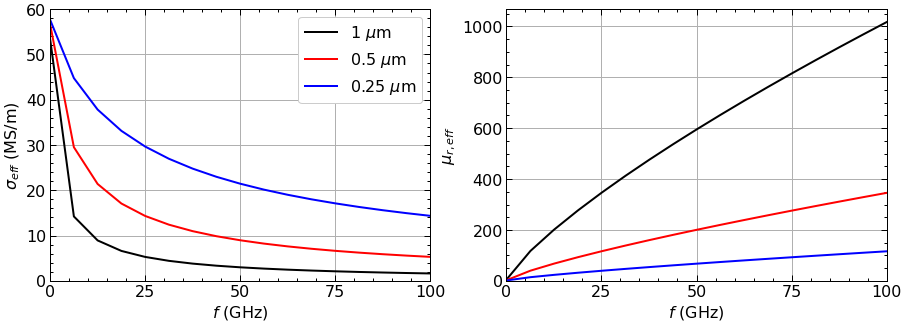

In [8]:
# Recreate Figure 6a in Grujic 2018

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(f/1e9, cond1/1e6, 'k', label=r'1 $\mu$m')
ax[0].plot(f/1e9, cond2/1e6, 'r', label=r'0.5 $\mu$m')
ax[0].plot(f/1e9, cond3/1e6, 'b', label=r'0.25 $\mu$m')
ax[0].legend(frameon=True, framealpha=1)
ax[0].set_ylabel(r"$\sigma_{eff}$ (MS/m)")
ax[0].set_xlabel("$f$ (GHz)")
ax[0].set_xticks(ticks=[0, 25, 50, 75, 100])
ax[0].set_xlim([0, 100])
ax[0].set_ylim([0, 60])
ax[0].grid()

ax[1].plot(f/1e9, ur1, 'k', label=r'1 $\mu$m')
ax[1].plot(f/1e9, ur2, 'r', label=r'0.5 $\mu$m')
ax[1].plot(f/1e9, ur3, 'b', label=r'0.25 $\mu$m')
ax[1].set_ylabel(r"$\mu_{r,eff}$")
ax[1].set_xlabel("$f$ (GHz)")
ax[1].set_xticks(ticks=[0, 25, 50, 75, 100])
ax[1].set_ylim(ymin=0)
ax[1].set_xlim([0, 100])
ax[1].grid();